Welcome to my audio analytics notebook © Arkaprabha Majumdar

So the most important external library that we'll be using is the **librosa** library, so let's get that...

along with the matplotlib for visualizations.

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display as dsp

In [ ]:
 %cd "/content/drive/My Drive/Colab Notebooks/dataset/Audio data"

/content/drive/My Drive/Colab Notebooks/dataset/Audio data


In [ ]:
os.listdir()

['Adhi-Adhi-Raat-Bilal-Saeed.mp3',
 'Wakhra-Swag-Inder-feat-Badshah.mp3',
 'BOHEMIA-Diwana.mp3',
 'Falak-soniye.mp3',
 'Jaguar-Muzical-Doctorz.mp3',
 'Patola-Guru-Randhawa.mp3',
 'So-High-Sidhu-Moosewala.mp3']

Now that we know that our repo has 7 music files, let's load them all up into a list.

The **librosa.load()** function returns two values - the signal and the sample rate

In [ ]:
music_files = []
c = 1
for files in os.listdir():
  print("loaded track . . ... " + str(c))
  music_files.append((librosa.load(files),files))
  c+=1

loaded track . . ... 1
loaded track . . ... 2
loaded track . . ... 3
loaded track . . ... 4
loaded track . . ... 5
loaded track . . ... 6
loaded track . . ... 7


Let's plot up the waveforms for the signals !

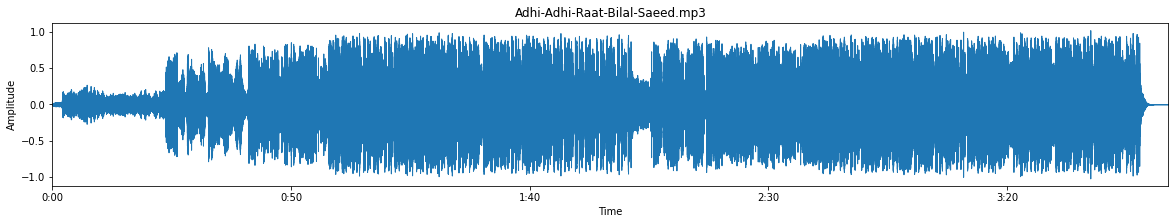

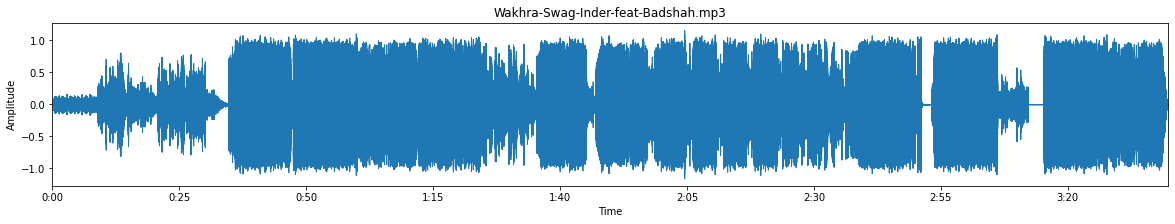

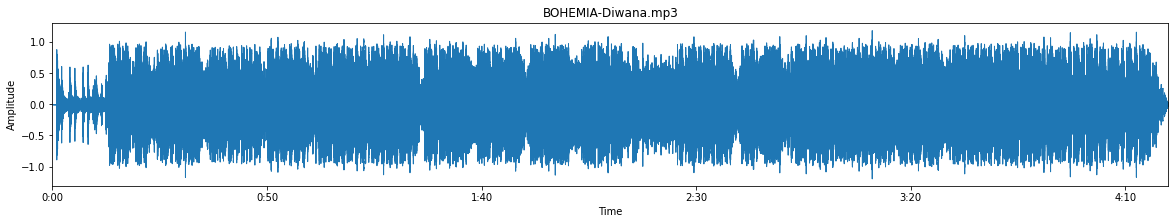

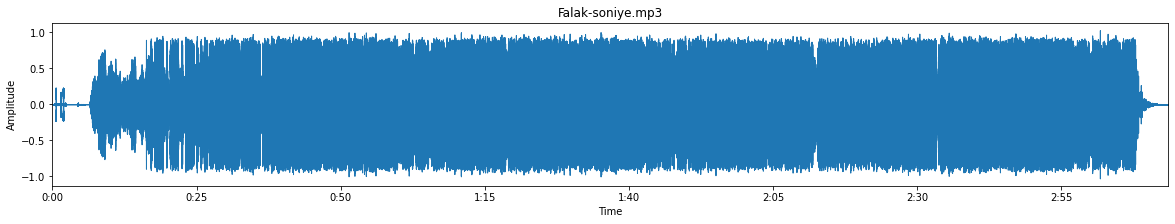

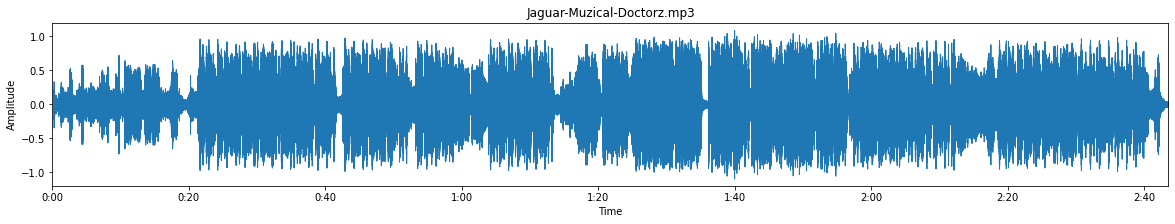

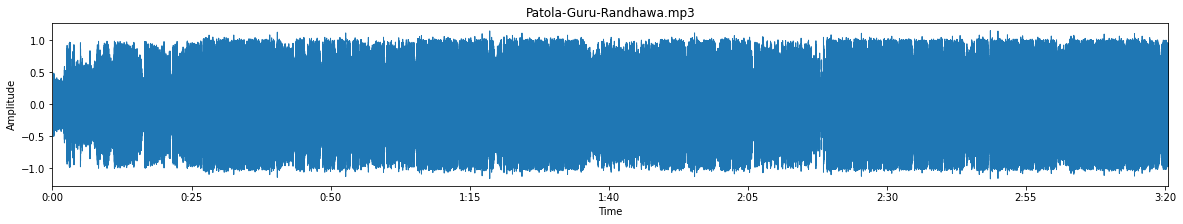

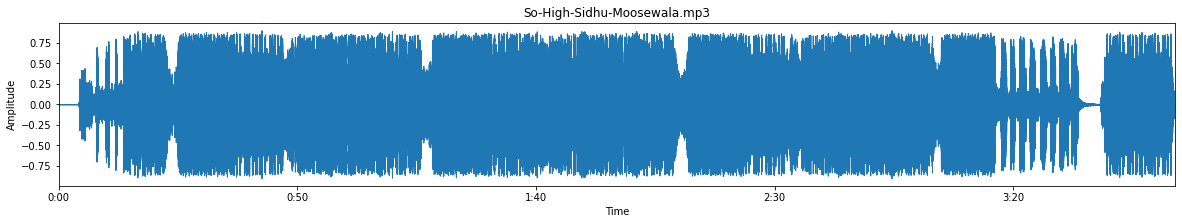

In [ ]:
for i in range(len(music_files)):
  plt.figure(figsize = (20,3))
  dsp.waveplot(music_files[i][0][0])
  plt.title(music_files[i][1])
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  plt.show()

Next, we must change it from the waveform to the frequency axis/domain

In [ ]:
track_fft=[]
magnitude_values=[]
frequency=[]

for i in range(len(music_files)):
  print("Track ... ",i)
  track_fft.append(np.fft.fft(music_files[i][0][0]))
  #we must take the amplitude portion of these values by taking the absolute value of this signal
  magnitude_values.append(np.abs(track_fft[i]))
  #we want to map these amplitudes onto the relative frequency bins (different for each track)
  frequency.append(np.linspace(0,music_files[i][0][1],len(magnitude_values[i])))
  #start value =0
  #stop value = sample rate = 22050
  #num of bins = len(magnitude)

Track ...  0
Track ...  1
Track ...  2
Track ...  3
Track ...  4
Track ...  5
Track ...  6


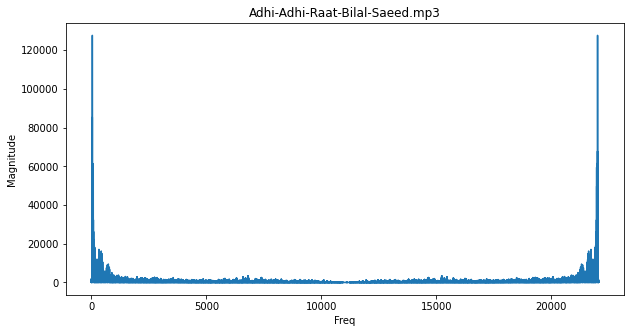

In [ ]:
plot_waves(music_files[1][0][0])

These are the spectrums for each of the tracks.

The plot shows how in the initial frequencies, the magnitude is the highest.
 - It is a property of the fourier transform to be symmetrical.
 - The first half is the only portion we need.

So let's crop the thing to first halves.

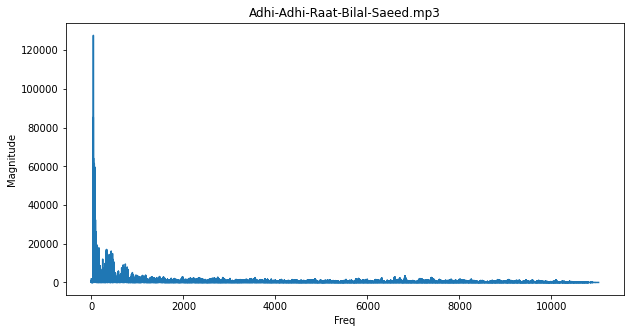

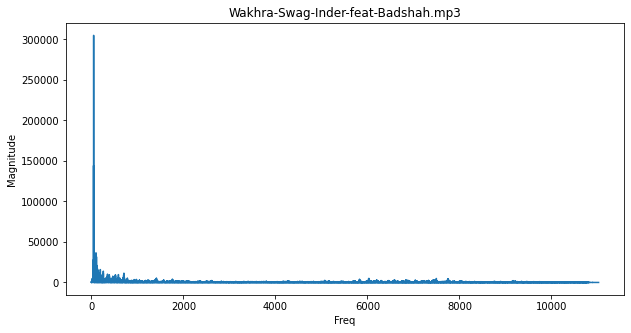

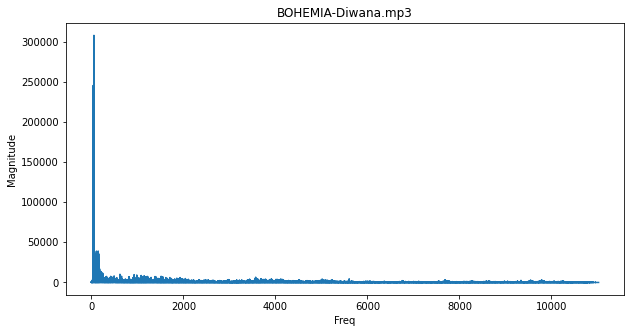

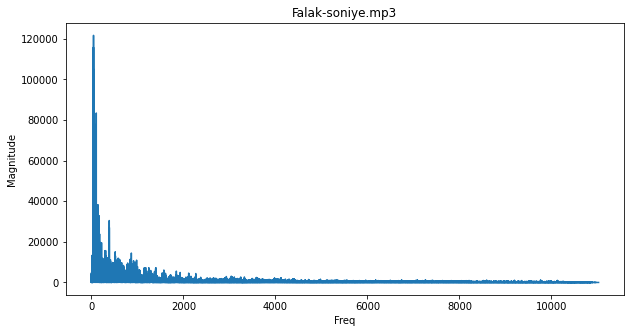

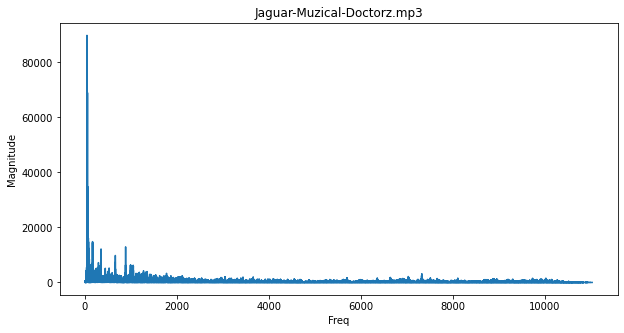

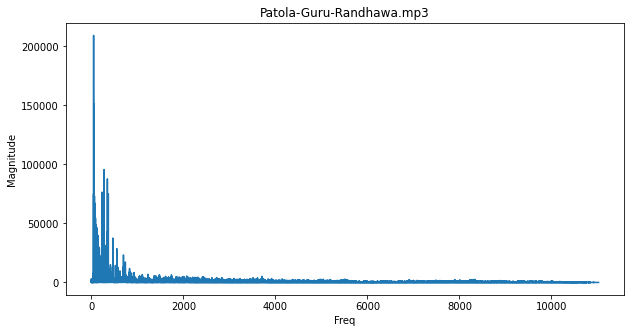

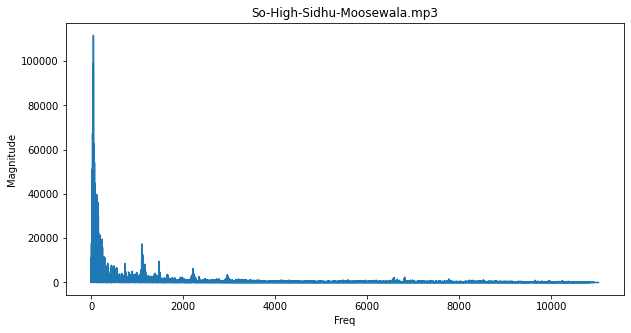

In [ ]:
left_freq = [x[:int(len(x)/2)] for x in frequency]
left_magn = [x[:int(len(x)/2)] for x in magnitude_values]

plot_waves(music_files)

The problem with the spectrum is that it is static.

So we'll need to perform STFT (**S**hort **T**ime **F**ourier **T**ransform):
- It takes several snapshots of the sound at time intervals, and we can plot spectrograms for each

In [ ]:
n_fft = 2048 #the number of values for each FT
hop_length = 512 #the interval
stft=[]
spectrograms = []

for i in range(len(music_files)):
  print("Stft done . .. ",i)
  ***Code Hidden***

Stft done . ..  0
Stft done . ..  1
Stft done . ..  2
Stft done . ..  3
Stft done . ..  4
Stft done . ..  5
Stft done . ..  6


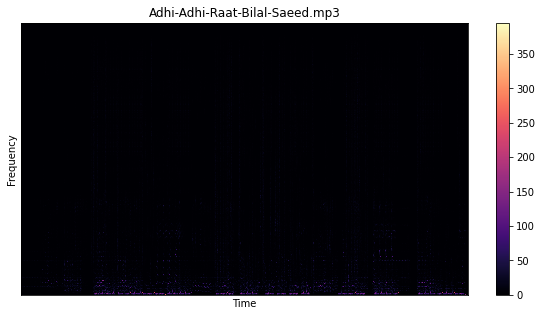

In [ ]:
plot_spectrogram(music_files)

If you notice at the bottom of the above plot, there are tiny dots of higher frequency.

We need to scale these values so that the color is more widely distributed.
This is the scale of decibels.

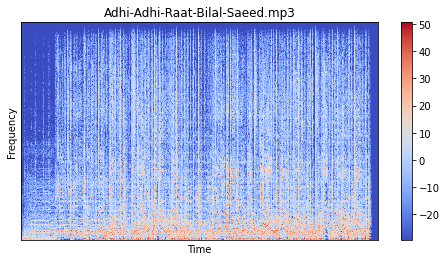

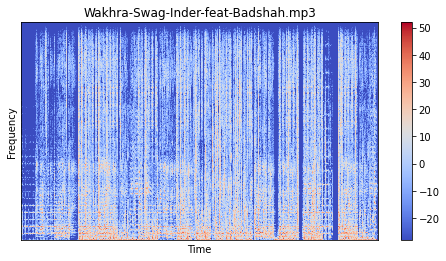

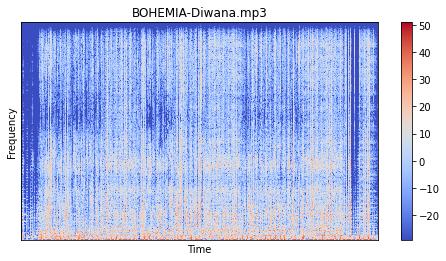

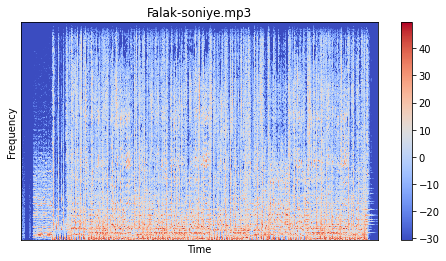

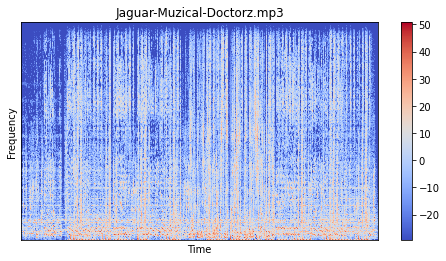

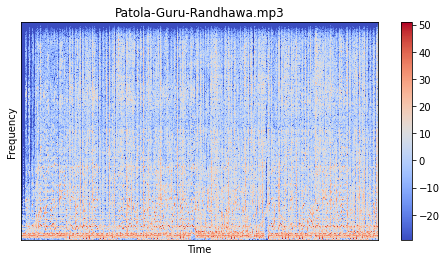

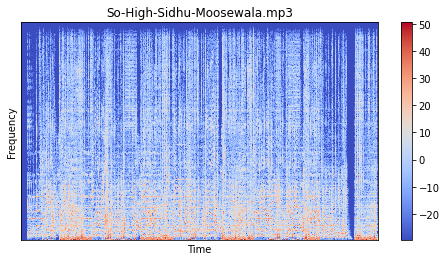

In [ ]:
log_spectrograms = [librosa.amplitude_to_db(x) for x in spectrograms]

plot_logspectrogram(music_files)

Here, blue parts are quiet and the red parts are the highest.

MFCC . ..  0


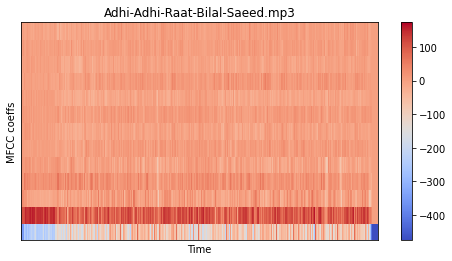

MFCC . ..  1


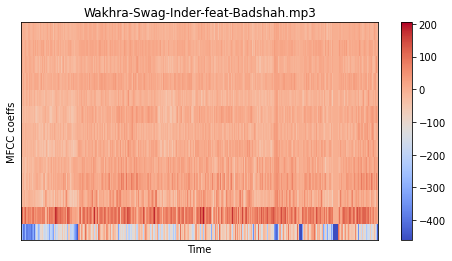

MFCC . ..  2


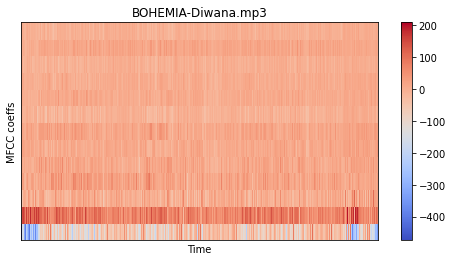

MFCC . ..  3


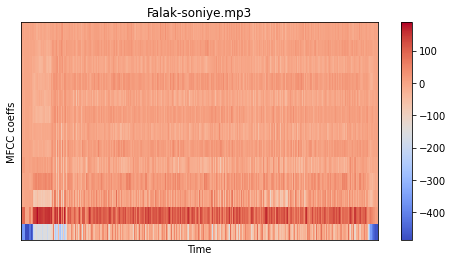

MFCC . ..  4


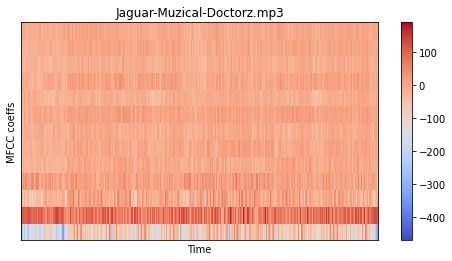

MFCC . ..  5


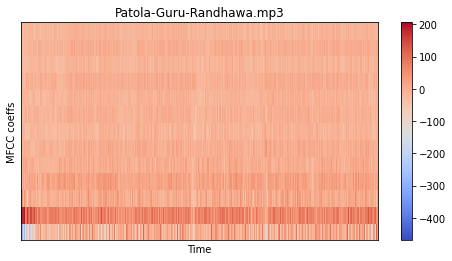

MFCC . ..  6


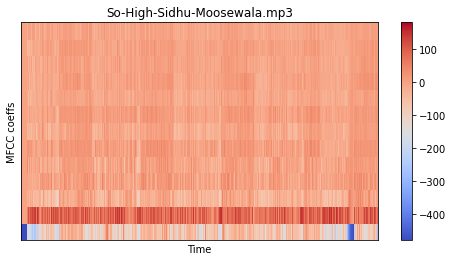

In [ ]:
mfcc_values = []

plot_mfcc(music_files)

In [ ]:
len(mfcc_values[0][0]) #x-axis = time

10070

In [ ]:
len(mfcc_values[0][0]) #x-axis = time

10070